# Predicting Loan Rejection

A model is created to predict whether a loan will be rejected or accepted. The prediction is based on how likely repayment of the loan is, which itself is predicted by a number of features in the data set. The data set has been taken from [here](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset). A Logistic Regression model is choosen for this application as a starting point. In the future, additional models may be tested on the same data set.

# The Approach

We use a one-hot encoding approach to encode non-numerical variables. A simple label encoder is used to encode the target variable. Variables are scaled before training.

An 80/20 split is used for the data set, with 80% of the data going to training, and 20% for testing.

# Results

The results of the model are discussed below.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42
TARGET_VARIABLE = ' loan_status_ Rejected' # The target variable after encoding
TEST_SIZE = 0.2

# Data Set taken from https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

df1 = pd.read_csv('loan_approval_dataset.csv')

print(df1.head())
print(df1.info())
print(df1.describe())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [7]:
def encode_variables(target_variable):
    # Encode categorical variables
    categorical_cols = df1.select_dtypes(include=['object']).columns.tolist()
    df1_encoded = pd.get_dummies(df1, columns=categorical_cols, drop_first=True)

    # Encode target variable
    le = LabelEncoder()
    df1_encoded[target_variable] = le.fit_transform(df1_encoded[target_variable])

    feature_cols = [col for col in df1_encoded.columns if col != target_variable and col != 'loan_id']
    X = df1_encoded[feature_cols]
    y = df1_encoded[target_variable]
    return X, y


X, y = encode_variables(TARGET_VARIABLE)

# Split the data set for training and testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# Scale the variables

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Create and train the model

model = LogisticRegression(random_state=RANDOM_STATE)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Accuracy: 0.9227

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       531
           1       0.92      0.88      0.90       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854



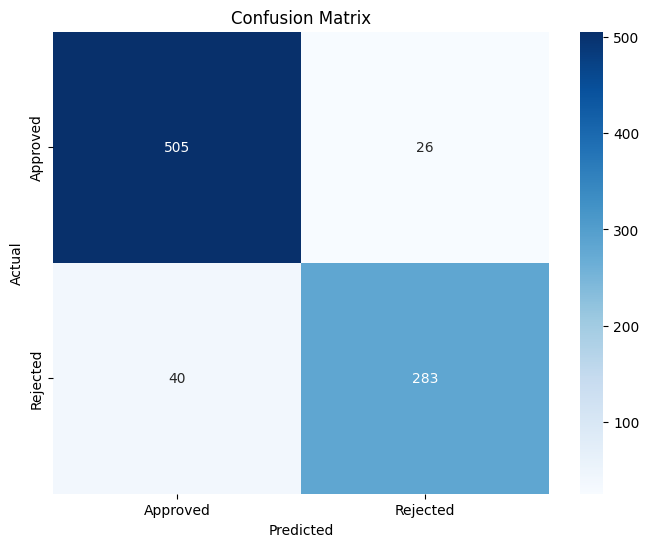

In [9]:
# Prepare accuracy and classification report, and confusion matrix

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Approved', 'Rejected'], yticklabels=['Approved', 'Rejected'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Cross-validation scores: [0.9033675  0.92532943 0.89604685 0.9136164  0.92093704]
Mean CV accuracy: 0.9119 (+/- 0.0217)


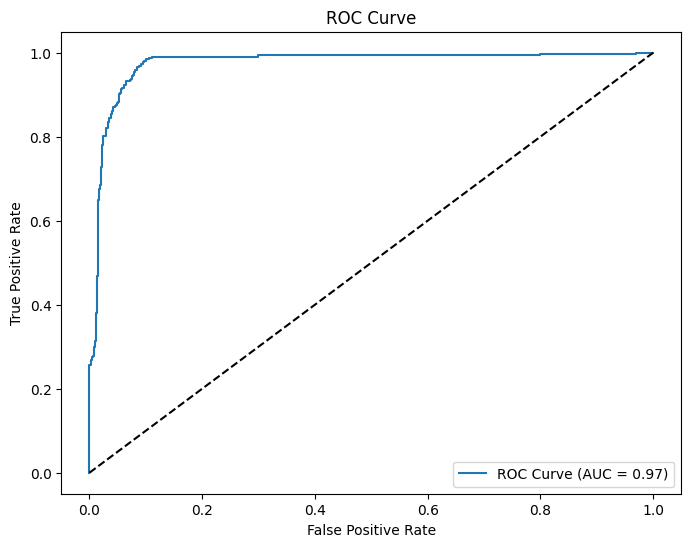

In [13]:
# Determine cross-validation score and ROC curve

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

if len(np.unique(y)) == 2:
    from sklearn.metrics import roc_curve, auc
    
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Analysis of the Results

An accuracy of 0.9227 is quite good, indicating that the model decides correctly most of the time. The model approves more loans which were originally rejected than it rejects those which were approved (40 vs 26), indicating a slight bias towards approving loans.

The ROC curve shows very low false-positive reporting. A standard deviation of 2.17% indicates very little variance. Dividing data into 5 buckets and analyzing their accuracy gives values ranging aproximately from 0.896 to 0.925, signalling minimal over-fitting.


Over-all, the model has performed quite well. However, future improvements may include:

- reducing the slight bias towards accepting loans
- experimenting other models (such as random forests) in search of better results
- engaging in further explatory data analysis (EDA) to reveal insights about data guiding model building